<a href="https://colab.research.google.com/github/Yuma-Ichikawa/pytorch/blob/master/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ネットワークの定義

Pytorchのネットワークを定義する方法は大きく分けて二つあります。

- nn.Sequential : 自作クラスを作成
- 自作ネットワークを作成
    - コンストラクタ : ネットワーク層の定義
    - forwardメソッド : 順伝搬
    

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### サンプルデータを生成

In [13]:
sample = torch.randn(1, 10)
sample

tensor([[-0.7793, -0.3066, -0.2111,  0.9219, -0.9138,  0.5532,  0.2976, -0.5031,
          0.0075,  0.5750]])

### Sequentialを使用する方法

In [3]:
# Sequentialの書き方
model = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 10)
            )

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


In [4]:
y = model(sample)
y

tensor([[-0.1519, -0.0645,  0.2597,  0.0633, -0.0683, -0.0930, -0.1970, -0.2041,
          0.2891, -0.0963]], grad_fn=<AddmmBackward>)

### ネットワークをモジュール化する方法

In [5]:
# ネットワークのモジュール化
class Model(nn.Module):
    def __init__(self, input):
        super(Model, self).__init__()
        
        # ネットワークを定義
        self.linear1 = nn.Linear(input, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 10)
        self.relu = nn.ReLU()

    # 順伝搬を定義
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [7]:
# instance化
model = Model(input=10)

# 順伝搬
y = model(sample)
y

tensor([[ 0.0338,  0.1522,  0.2269, -0.2712, -0.1680,  0.1589, -0.2678, -0.2639,
          0.2933,  0.0669]], grad_fn=<AddmmBackward>)

### 自作モジュールを複数使用し新たな自作モジュールを作成する方法

In [8]:
# Custum Layer
class CustomLayer(nn.Module):
    def __init__(self, input, output):
        super(CustomLayer, self).__init__()
        self.linear=nn.Linear(input, output)
        self.relu=nn.ReLU()
    def forward(self, x):
        x=self.linear(x)
        x=self.relu(x)
        return x

In [11]:
# ネットワークをモジュール化
class Model(nn.Module):
    def __init__(self, input):
        super(Model, self).__init__()
        self.custom1 = CustomLayer(input, 32)
        self.custom2 = CustomLayer(32, 16)
        self.linear3 = nn.Linear(16, 10)

    def forward(self, x):
        x = self.custom1(x)
        x = self.custom2(x)
        x = self.linear3(x)
        return x

In [12]:
model = Model(input=10)
y = model(sample)
y

tensor([[ 0.1433,  0.0858, -0.0468,  0.0335,  0.0948,  0.1795,  0.0362, -0.0126,
          0.0983, -0.1097]], grad_fn=<AddmmBackward>)

# ネットワークの可視化方法

torchvizを使用する方法を解説していきます。

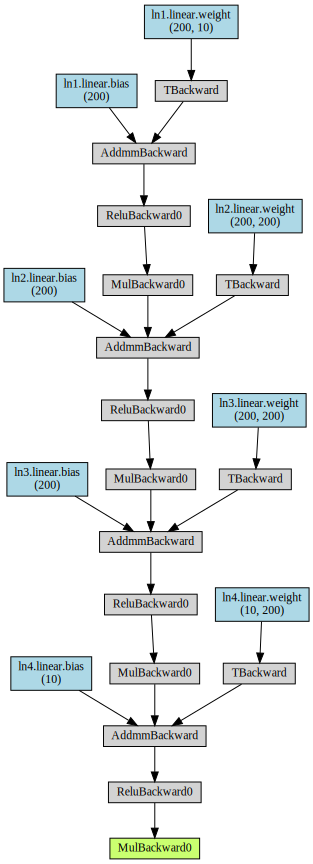

In [29]:
make_dot(y, params=dict(model.named_parameters()))

In [7]:
!pip3 install torchviz

     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=ee56f7d38cc3b82734ff23ecb2e5e1ba6dff05550bda6c648d179c1d454aba89
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [8]:
# PyTorchViz
from torchviz import make_dot

In [9]:
# NN構築用のクラス
class NnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10,5)
        self.fc2 = nn.Linear(5,2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

# モデル定義
model = NnModel()

# 擬似乱数のシード固定
torch.manual_seed(0)
datas = torch.randn(1,10)

# 予測値
y = model(datas)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


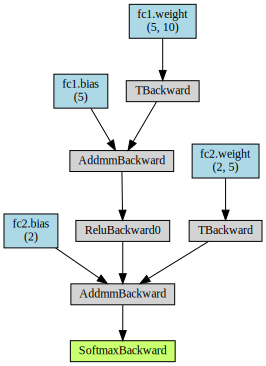

In [10]:
# ビジュアライズ化
# 予測値が引数になる！
make_dot(y, params=dict(model.named_parameters()))